# Preprocessing atlas: Agarwal

<div class="alert alert-warning">

**What this notebook does**

In this notebook, the count table of the Human atlas of Agarwal et.al. will be loaded into scanpy and be annotated for future processing, integration and downstream analysis.
</div>  



### Loading libraries
Using sc2_seurat environment, importing packages and setting parameters.

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import matplotlib.pyplot as plt
import h5py
import scipy
import GEOparse

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

### h5 files

In [81]:
path='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/agarwal_2021'

GSM4157068=f'{path}/GSM4157068/outs/GSM4157068_cellbender_filtered.h5'
GSM4157069=f'{path}/GSM4157069/outs/GSM4157069_cellbender_filtered.h5'
GSM4157070=f'{path}/GSM4157070/outs/GSM4157070_cellbender_filtered.h5'
GSM4157072=f'{path}/GSM4157072/outs/GSM4157072_cellbender_filtered.h5'
GSM4157074=f'{path}/GSM4157074/outs/GSM4157074_cellbender_filtered.h5'
GSM4157076=f'{path}/GSM4157076/outs/GSM4157076_cellbender_filtered.h5'
GSM4157078=f'{path}/GSM4157078/outs/GSM4157078_cellbender_filtered.h5'

In [82]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing')

In [83]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/1_preprocessing'

In [84]:
a = "GSM4157068,GSM4157069,GSM4157070,GSM4157072,GSM4157074,GSM4157076,GSM4157078"
print(a.split(','))

['GSM4157068', 'GSM4157069', 'GSM4157070', 'GSM4157072', 'GSM4157074', 'GSM4157076', 'GSM4157078']


## Load data

In [85]:
files = [GSM4157068,GSM4157069,GSM4157070,GSM4157072,GSM4157074,GSM4157076,GSM4157078]
names = ['GSM4157068', 'GSM4157069', 'GSM4157070', 'GSM4157072', 'GSM4157074', 'GSM4157076', 'GSM4157078']

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157068 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157069 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157070 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157072 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157074 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_GSM4157076 is loaded
adata_GSM4157078 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


## Basic Preprocessing
### Doublet detection using scrublet
Doublets are droplets that captures two cells, which will lead to inconsistencies. So we need to detect and remove them. First we will annotate the objects with metadata.

https://github.com/swolock/scrublet
https://www.sciencedirect.com/science/article/pii/S2405471218304745

Following the advice of Chromium (below). The expected cells are: \
['2036', '1504', '1171', '733', '2058', '1928', '1400'] \
and expected doublet rates: \
[0.0163, 0.012, 0.0094, 0.0069, 0.0164, 0.0154, 0.0112] \
for: \
[GSM4157068,GSM4157069,GSM4157070,GSM4157072,GSM4157074,GSM4157076,GSM4157078]

> https://uofuhealth.utah.edu/huntsman/shared-resources/gba/htg/single-cell/genomics-10x.php

\
First check the recommended threshold by scrublet (minimum mode of real and simulate data). With good bimodel distribution it should be fine otherwise set a threshold manually.


In [86]:
names

['GSM4157068',
 'GSM4157069',
 'GSM4157070',
 'GSM4157072',
 'GSM4157074',
 'GSM4157076',
 'GSM4157078']

In [87]:
numberobj

7

(2268, 60656)
(2464, 60656)
(1312, 60656)
(805, 60656)
(2281, 60656)
(2797, 60656)
(1753, 60656)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.4%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 2.6%


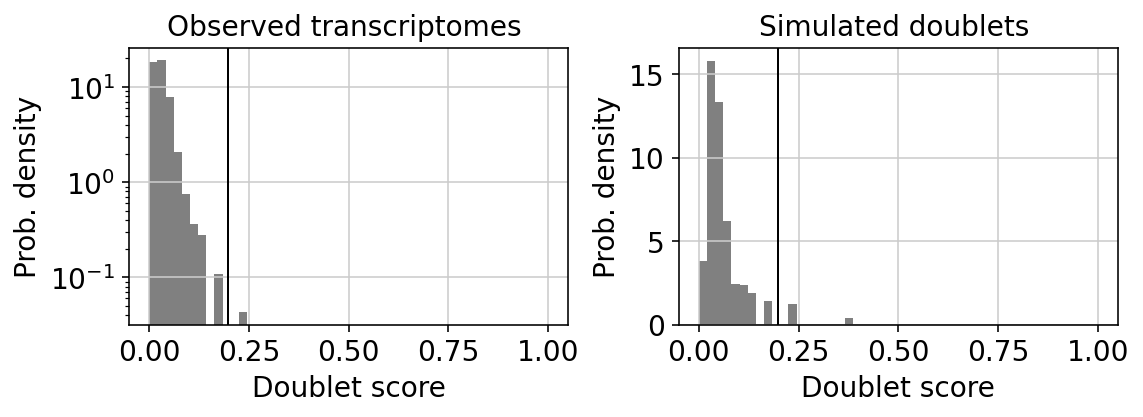

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 6.6%
Overall doublet rate:
	Expected   = 1.2%
	Estimated  = 2.4%


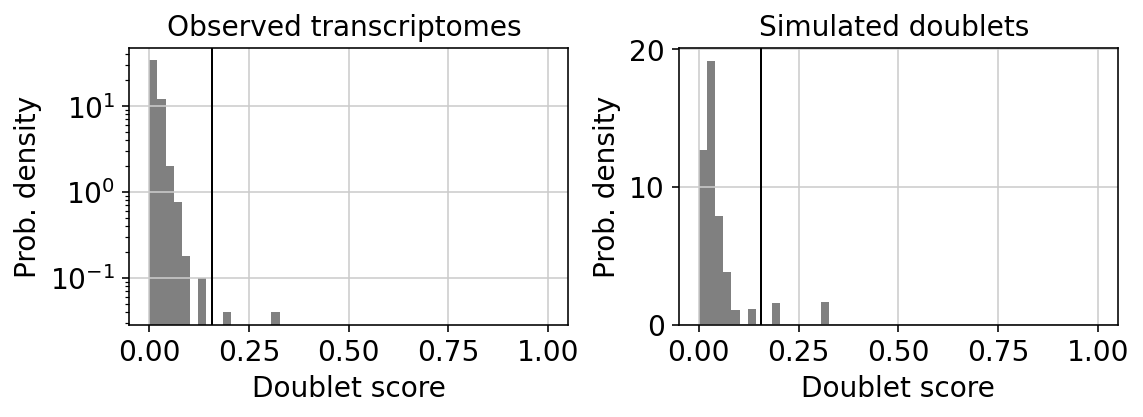

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.10
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 0.9%
	Estimated  = 18.2%


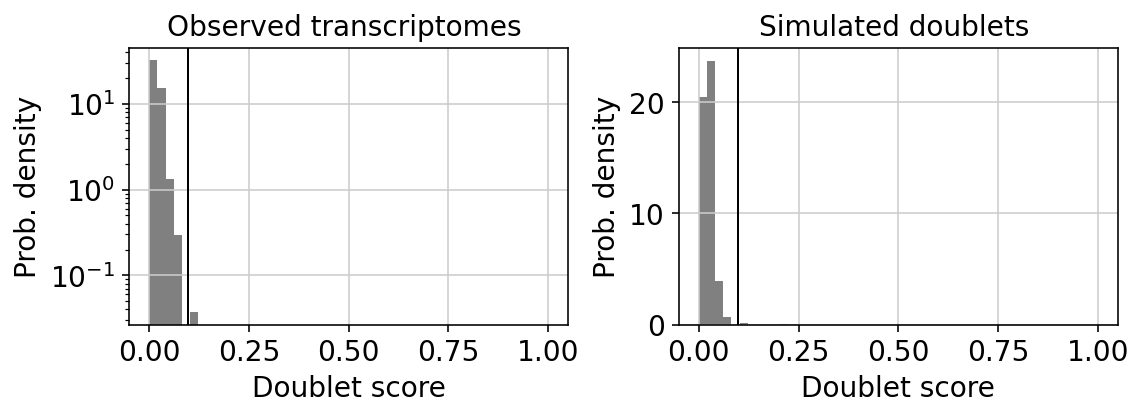

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.06
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 8.8%
Overall doublet rate:
	Expected   = 0.7%
	Estimated  = 12.7%


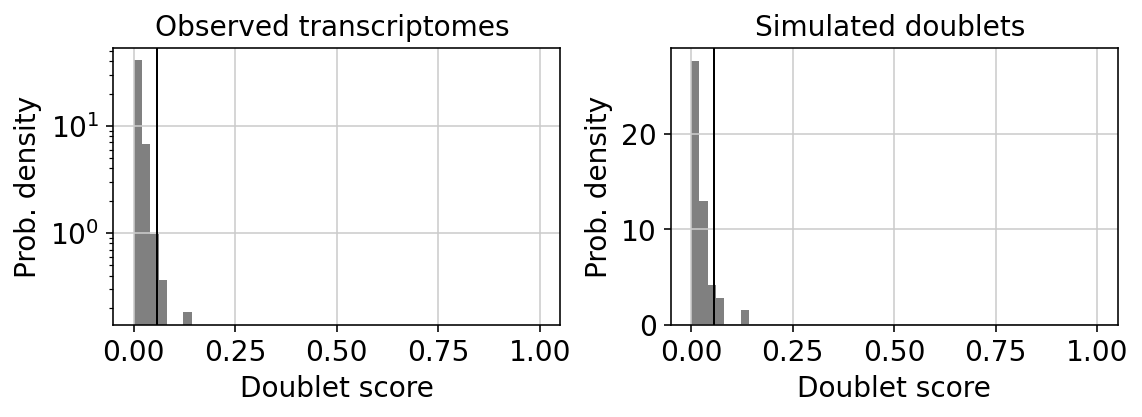

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 3.7%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 11.9%


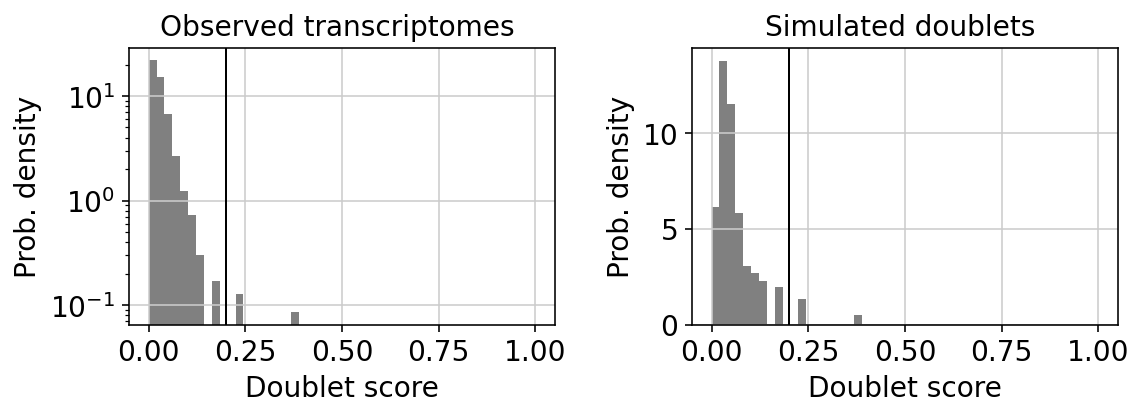

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.6%
Overall doublet rate:
	Expected   = 1.5%
	Estimated  = 2.2%


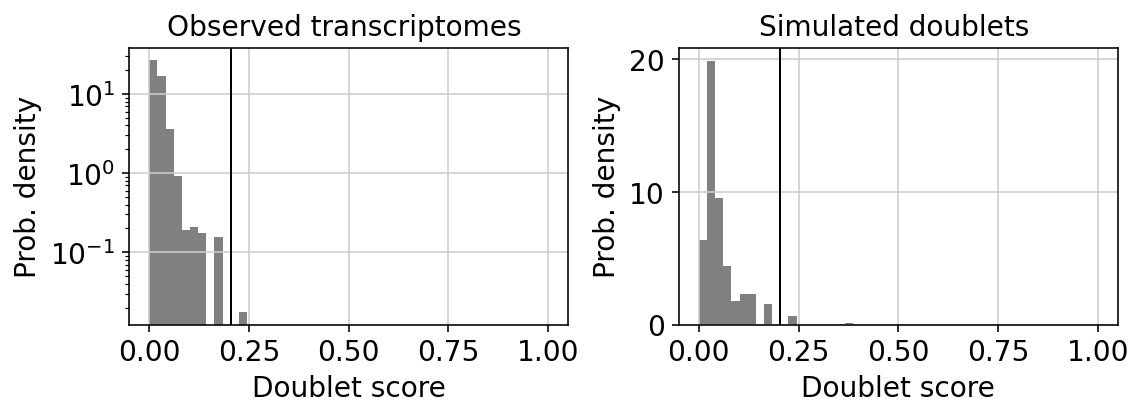

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.13
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 6.4%
Overall doublet rate:
	Expected   = 1.1%
	Estimated  = 4.5%


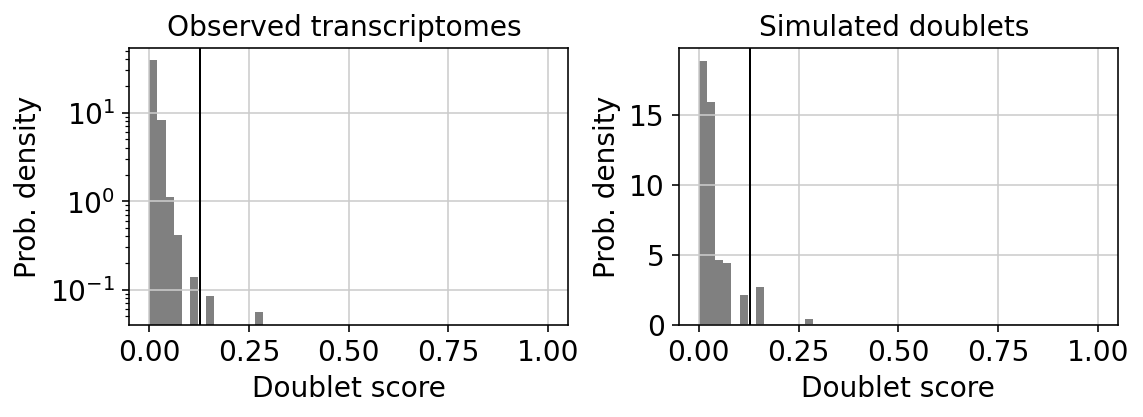

In [88]:
#manually adding metadata due to lack of metadata file
for i in range(numberobj):
    locals()[object_names[i]].obs['species'] = ['Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien'][i]
    locals()[object_names[i]].obs['gender'] = ['male','male','female','male','male','male','female'][i]
    locals()[object_names[i]].obs['age'] = [59,70,56,70,55,70,56][i]
    locals()[object_names[i]].obs['instrument'] = ['Illumina HiSeq 4000','Illumina HiSeq 4000','Illumina HiSeq 4000','Illumina HiSeq 4000','Illumina HiSeq 4000','Illumina HiSeq 4000','Illumina HiSeq 4000'][i]
    locals()[object_names[i]].obs['technology'] = ['10x_v3','10x_v3','10x_v3','10x_v3','10x_v3','10x_v3','10x_v3'][i]
    locals()[object_names[i]].obs['atlas'] = ['agarwal','agarwal','agarwal','agarwal','agarwal','agarwal','agarwal'][i]
    locals()[object_names[i]].obs['sample'] = ['GSM4157068', 'GSM4157069', 'GSM4157070', 'GSM4157072', 'GSM4157074', 'GSM4157076', 'GSM4157078'][i]
    locals()[object_names[i]].obs['batch_1'] = ['day_1','day_1','day_1','day_2','day_2','day_2','day_2'][i]
    
#viewing object annotations
for i in range(numberobj):
    print(locals()[object_names[i]].shape)
    

thr = None
expected_doublet_rates = [0.0163, 0.012, 0.0094, 0.0069, 0.0164, 0.0154, 0.0112]
for i in range(numberobj):
    #predicts doublets and adds a score to objects
    sc.external.pp.scrublet(locals()[object_names[i]], expected_doublet_rate=expected_doublet_rates[i], stdev_doublet_rate=0.02, 
                            synthetic_doublet_umi_subsampling=1.0, knn_dist_metric='euclidean', normalize_variance=True, 
                            log_transform=False, mean_center=True, n_prin_comps=30, use_approx_neighbors=True, 
                            get_doublet_neighbor_parents=False, n_neighbors=None, threshold=thr, verbose=True, copy=False, random_state=0)
    #plot histogram of doublet scores(doesnt work in loop)
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),
                                               show=True,return_fig=True)


Check how many cells are higher than the threshold

In [90]:
for i in range(numberobj):
    print(names[i],'\n',locals()[object_names[i]].obs['predicted_doublet'].value_counts(),'\n')

GSM4157068 
 False    2266
True        2
Name: predicted_doublet, dtype: int64 

GSM4157069 
 False    2458
True        4
Name: predicted_doublet, dtype: int64 

GSM4157070 
 False    1310
True        1
Name: predicted_doublet, dtype: int64 

GSM4157072 
 False    795
True       9
Name: predicted_doublet, dtype: int64 

GSM4157074 
 False    2270
True       10
Name: predicted_doublet, dtype: int64 

GSM4157076 
 False    2789
True        1
Name: predicted_doublet, dtype: int64 

GSM4157078 
 False    1743
True        5
Name: predicted_doublet, dtype: int64 



### Scrublet simulation plot

GSM4157068


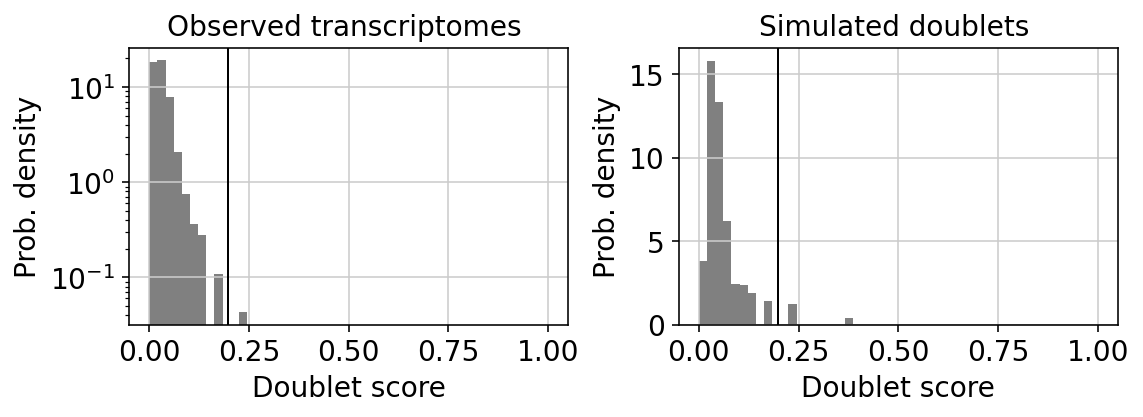

GSM4157069


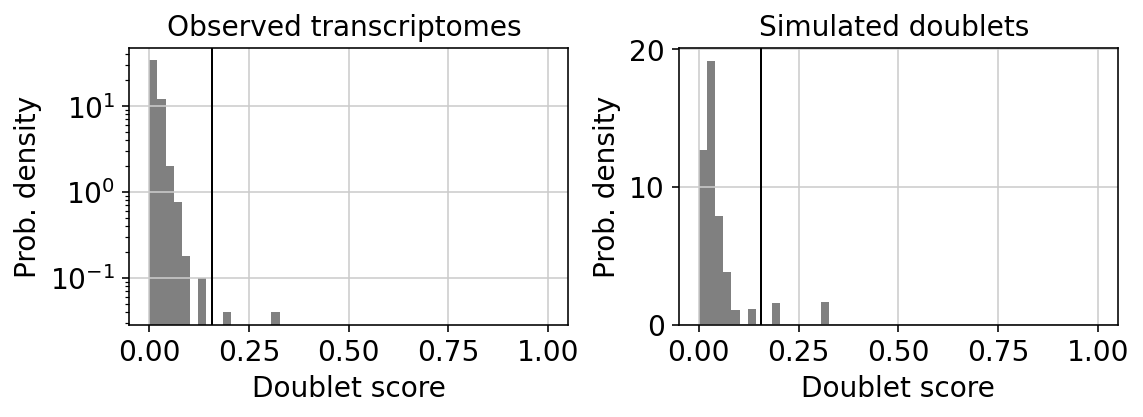

GSM4157070


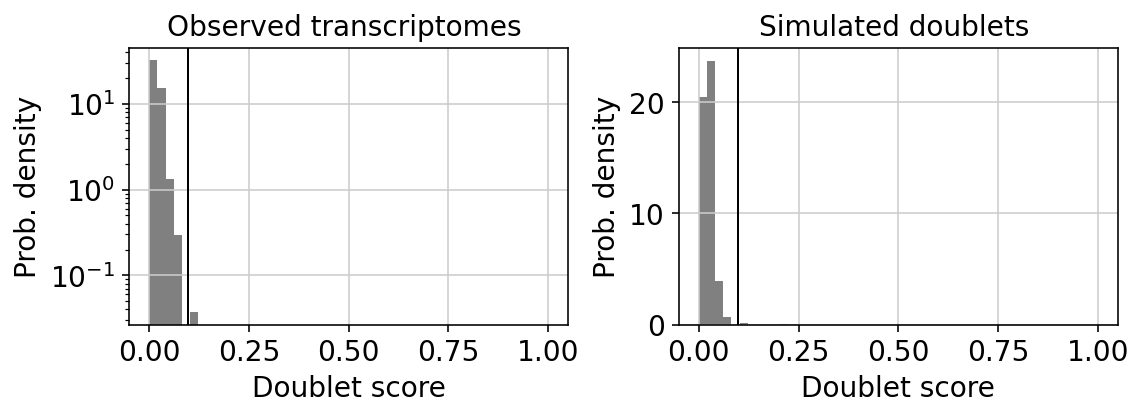

GSM4157072


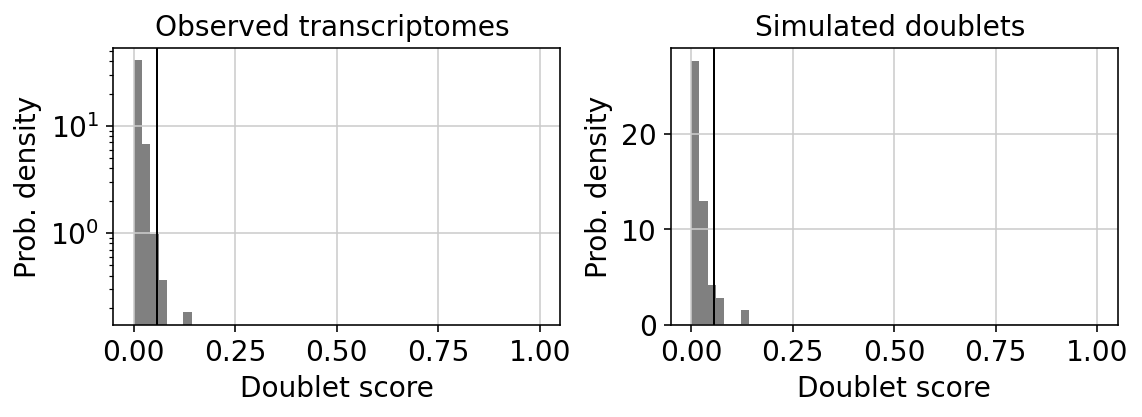

GSM4157074


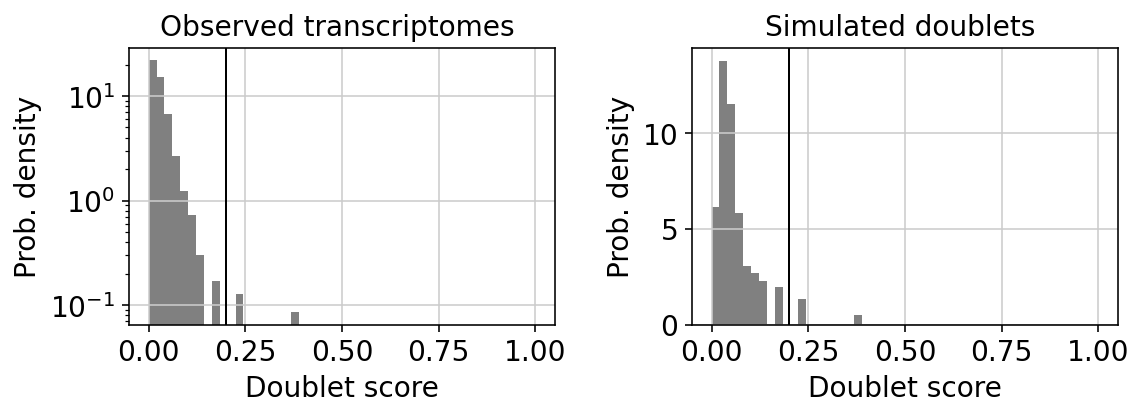

GSM4157076


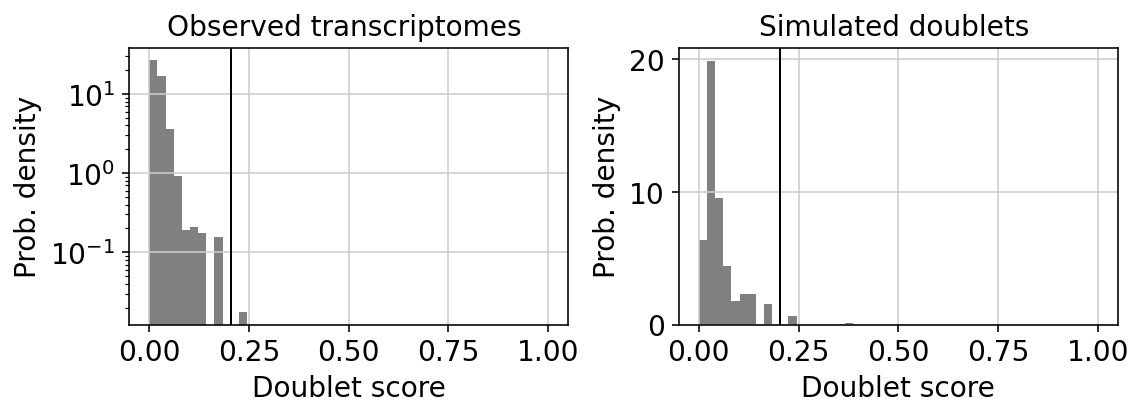

GSM4157078


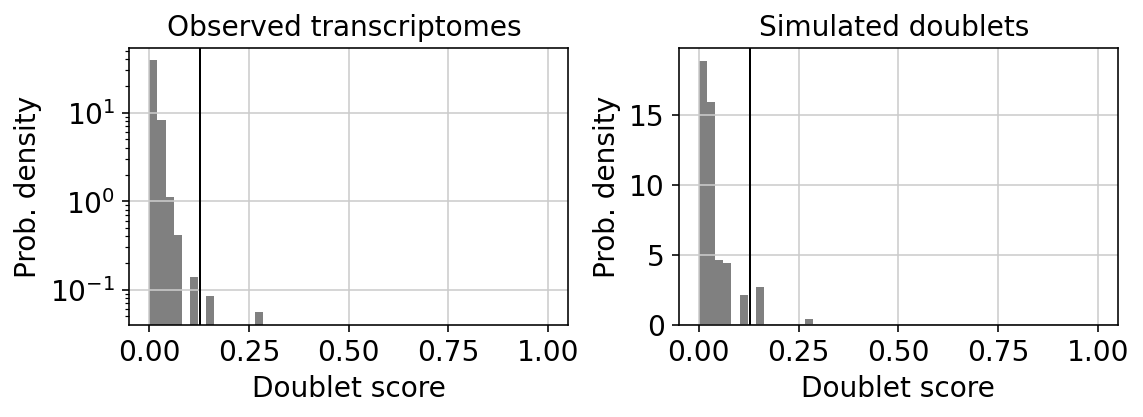

In [91]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),show=True,return_fig=True)

### Add QC and get rid of mitochondrial genes

<b> check this: sc.pp.calculate_qc_metrics() </b> <br>
expr_type: kind of values in X (str)<br>
var_type: kind of variables (str)<br>
qc_vars: keys for variables you want to control (collection of str)<br>
percent_top: proportions of top genes to cover, for cummulative proportion of counts (collection of int)<br>
layer: alternative layers for expression data (str)<br>
use_raw: use adata.raw.X for expression values (bool)<br>
inplace: place metrics in adata (bool)<br>
log1p: compute log1p transformed annotations, for very small values (bool)<br>
<br>
<b> return features obs </b> <br>
n_genes_by_counts: The number of genes with at least 1 count in a cell. <br>
total_counts: Total number of counts for a cell. <br>
total_counts_mt:Total number of mt gene counts for a cell. <br>
pct_counts_mt: Proportion (%) of total counts for a cell which are mitochondrial. <br> 
n_genes: Number of genes with a positive count. <br>
total_counts_ribo: Total number of ribosomal counts for a cell. <br>
pct_counts_ribo: Proportion of total counts for a cell which are ribosomal.

In [94]:
import numpy as np

for i in range(numberobj):
    #add mt variable annotation indicating if a gene is ribosomal or not (bool)
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('MT-')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('mt-') 
        
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('RP')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('Rp')
    
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=('mt','ribo'), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
     
    locals()[object_names[i]].var_names_make_unique()
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1) #remove all cells with 0 genes
                 
    # The following is to solve a save issue. Probably because of the NA valies in ther 'predicted_doublet' slot
    locals()[object_names[i]].obs['predicted_doublet'] =  locals()[object_names[i]].obs['predicted_doublet'].astype('str')

    

In [97]:
adata_GSM4157076[adata_GSM4157076.obs['doublet_score'].isnull()]

,species,gender,age,instrument,technology,atlas,sample,batch_1,doublet_score,predicted_doublet,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,n_genes
CAAGGCCCACGAAAGC-1,Homo sapien,male,70,Illumina HiSeq 4000,10x_v3,agarwal,GSM4157076,day_2,NaN,nan,...,0.693147,1,0.693147,0,0.0,0.0,0,0.0,0.0,1


Checking median number of mitochondrial genes, genes and UMIs per cell to have an idea of the quality of each run:

In [48]:
print("Median numbers before filtering mt genes")
for i in range(numberobj):
    print(
         object_names[i],'\n',"\tmean mito%:",np.mean(locals()[object_names[i]].obs['pct_counts_mt']),'\n',
        "\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']),'\n', 
            "\tmedian reads/nuclei:",np.median(locals()[object_names[i]].obs['total_counts']),'\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:",  int(np.mean(locals()[object_names[i]].obs['total_counts'])), '\n')
    

Median numbers before filtering mt genes
adata_GSM4157068 
 	mean mito%: 0.04835665232865046 
 	median genes/nuclei: 845.0 
 	median reads/nuclei: 1173.0 
 	mean genes/nuclei: 993 
 	mean reads/nuclei: 1647 

adata_GSM4157069 
 	mean mito%: 0.13093959683905293 
 	median genes/nuclei: 453.5 
 	median reads/nuclei: 606.5 
 	mean genes/nuclei: 669 
 	mean reads/nuclei: 1091 

adata_GSM4157070 
 	mean mito%: 0.022679052923131132 
 	median genes/nuclei: 993.0 
 	median reads/nuclei: 1452.0 
 	mean genes/nuclei: 1220 
 	mean reads/nuclei: 2271 

adata_GSM4157072 
 	mean mito%: 0.025592647629703043 
 	median genes/nuclei: 1070.5 
 	median reads/nuclei: 1584.0 
 	mean genes/nuclei: 1273 
 	mean reads/nuclei: 2127 

adata_GSM4157074 
 	mean mito%: 0.3532964547210718 
 	median genes/nuclei: 1126.0 
 	median reads/nuclei: 1667.0 
 	mean genes/nuclei: 1303 
 	mean reads/nuclei: 2239 

adata_GSM4157076 
 	mean mito%: 0.3110457022831001 
 	median genes/nuclei: 485.0 
 	median reads/nuclei: 667.0 
 	

Filtering out mito genes to determine number of non mitochondrial genes:

In [36]:
for i in range(numberobj):
    #list all non mitochondrial genes for subsetting the columns
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
         non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('MT-')]
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('mt-')]
    
    
    locals()[object_names[i]] = locals()[object_names[i]][:, non_mito_genes_list].copy()
    
    locals()[object_names[i]].obs['total_counts_mito'] =  locals()[object_names[i]].obs['total_counts']
    
    
    #recalculate the number of genes, because some cells only had mt gene counts
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1)

### Recalculate metrics 
Note that the qc_vars=None because we want to keep the mt%."


In [37]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)

Check for the basic statistics

In [38]:
sc.set_figure_params(figsize=[8,8])

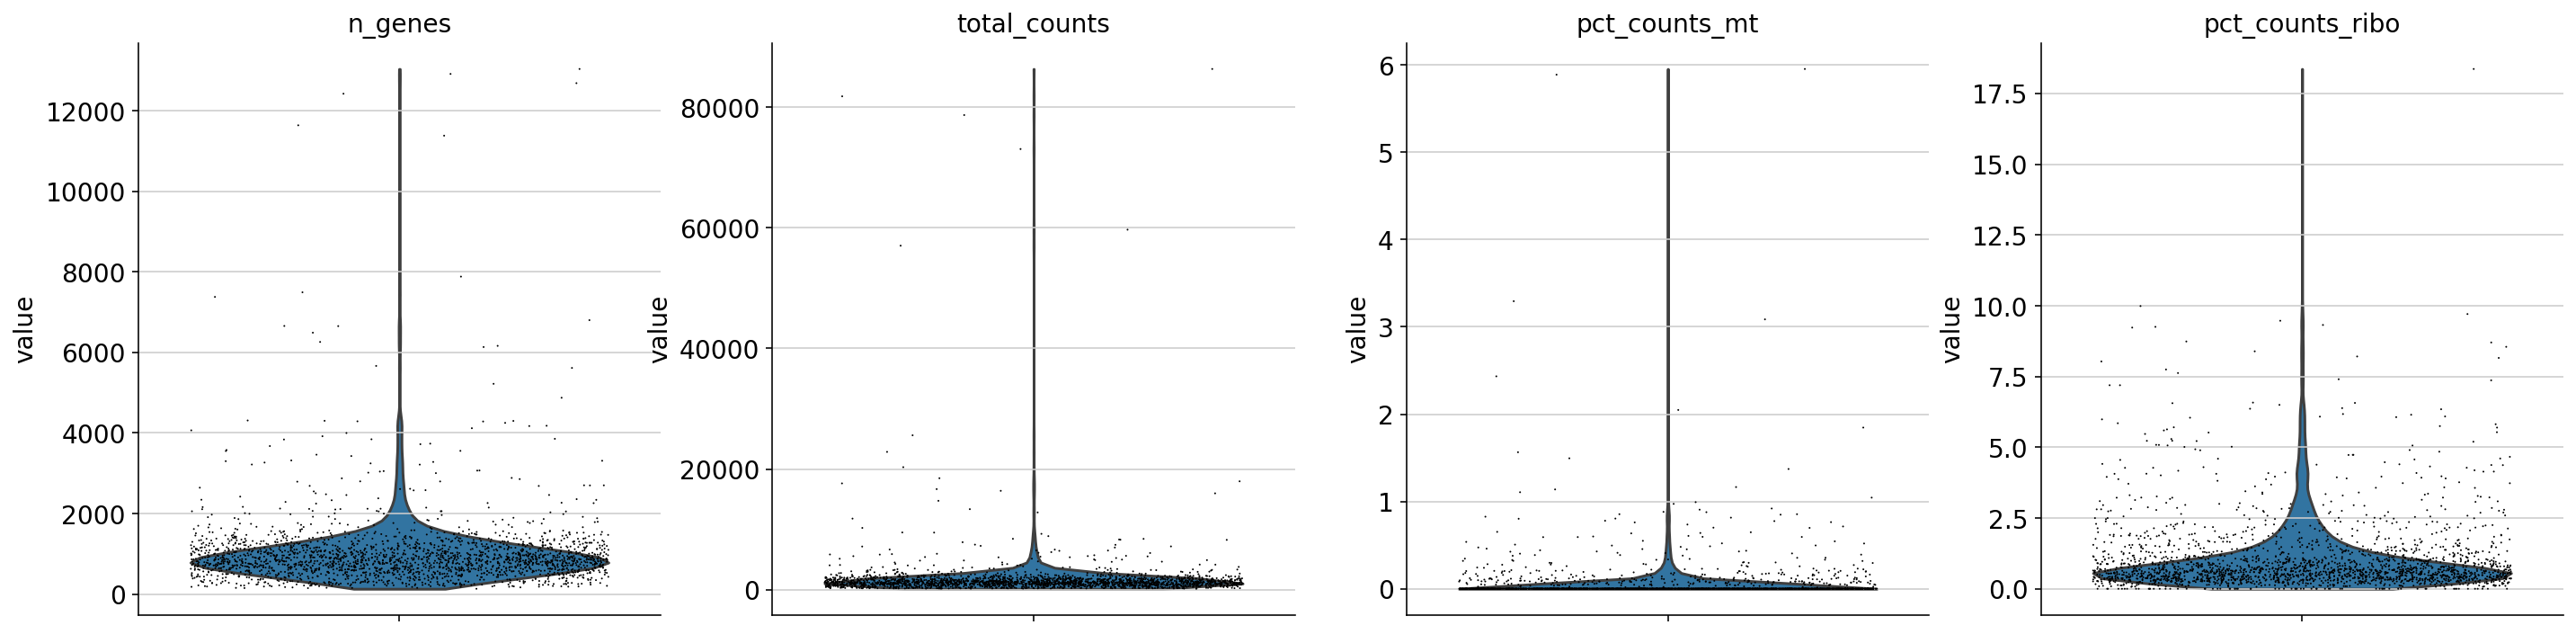

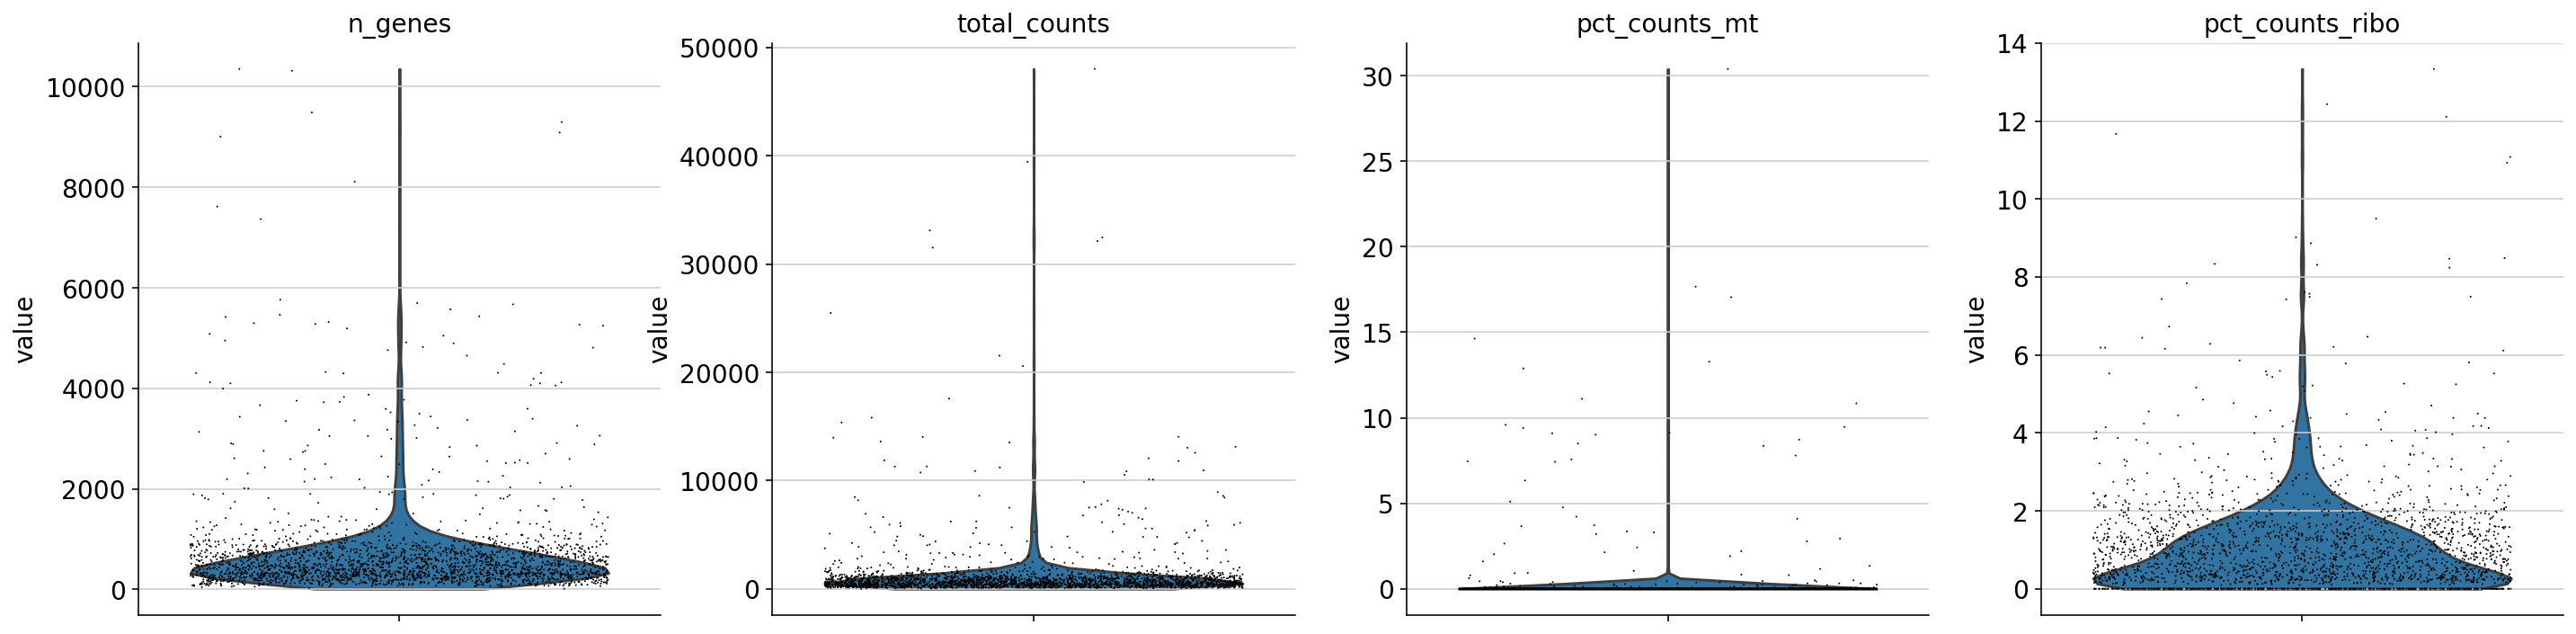

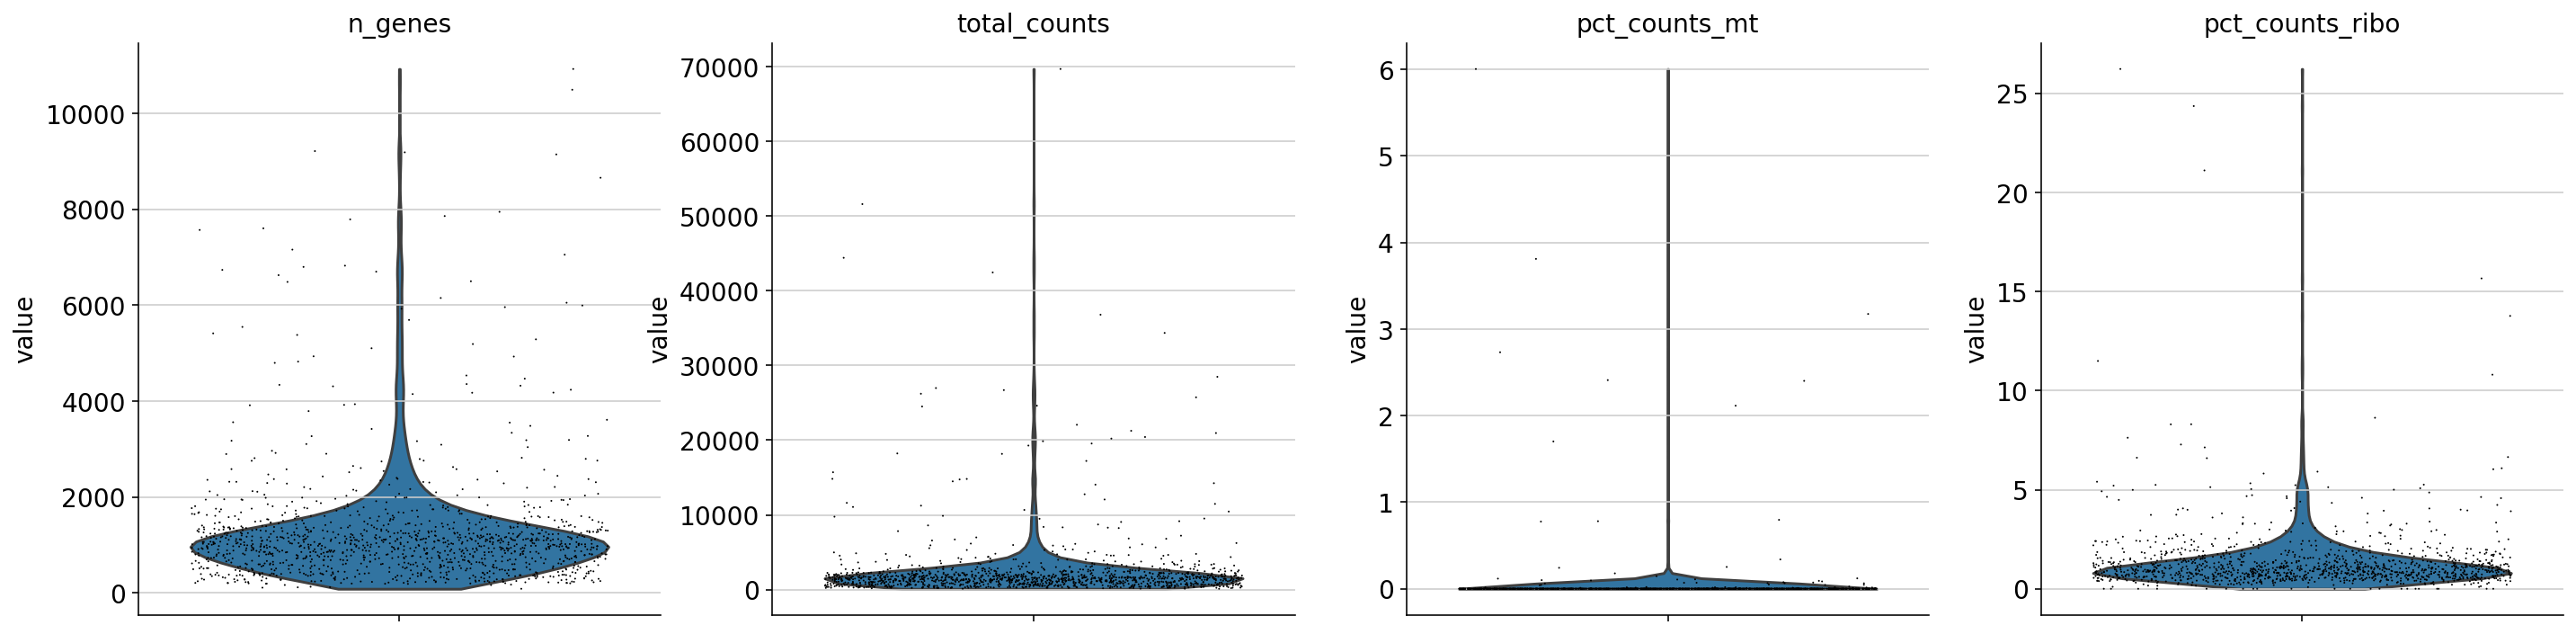

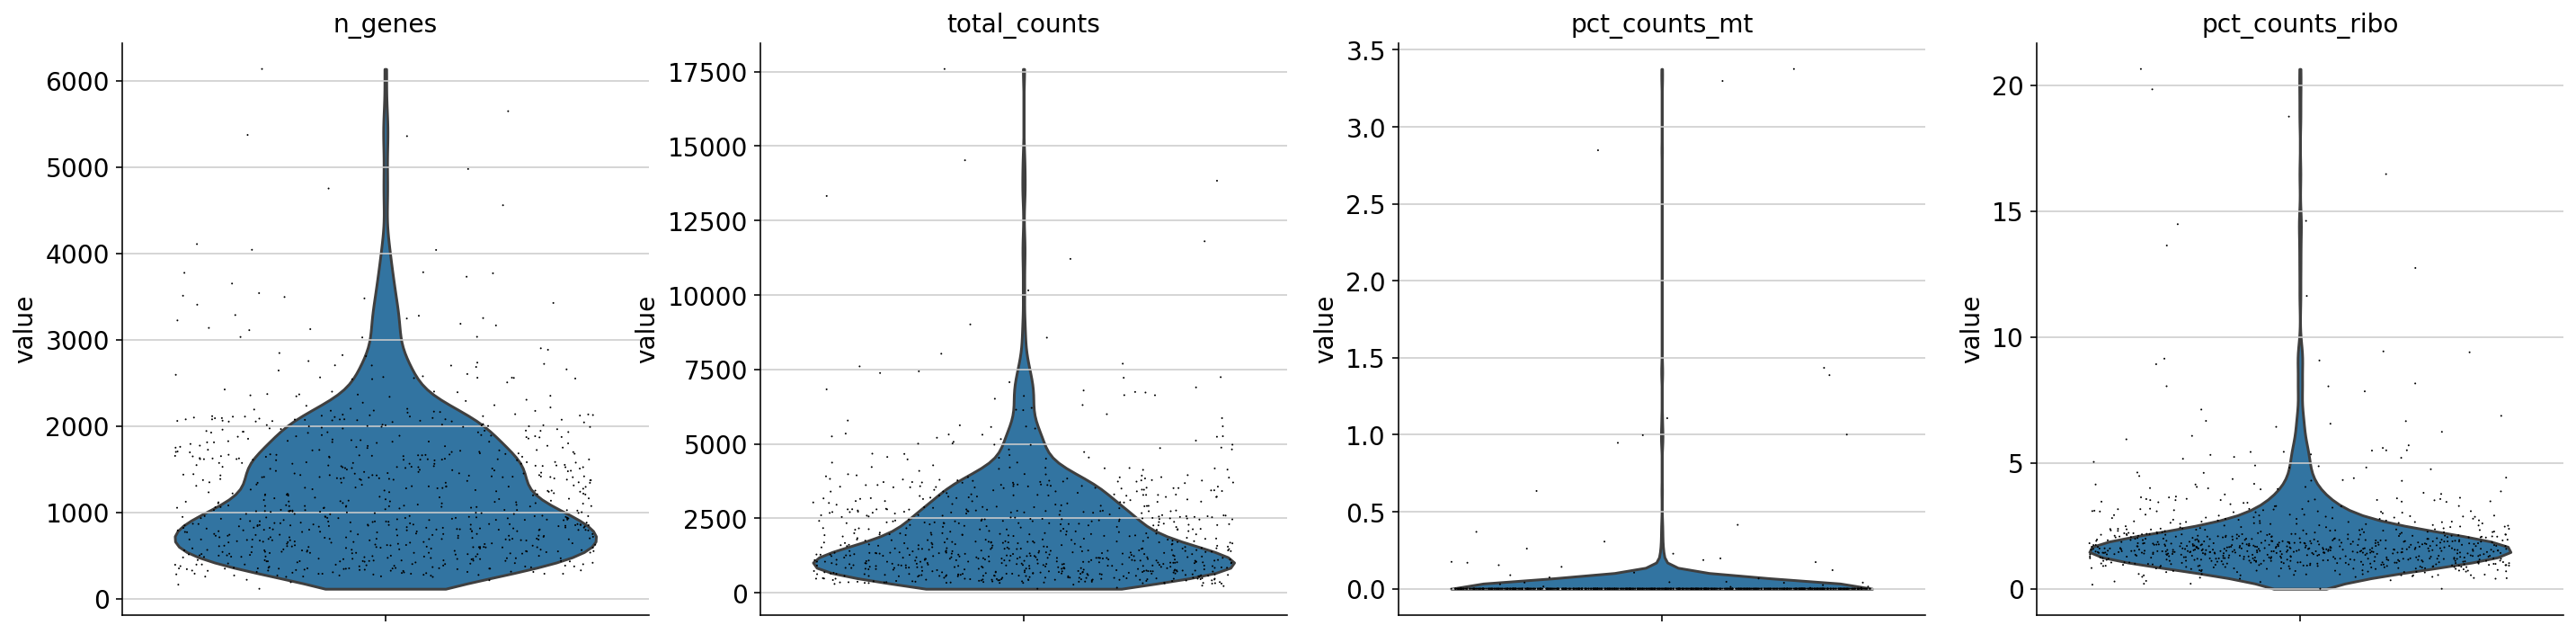

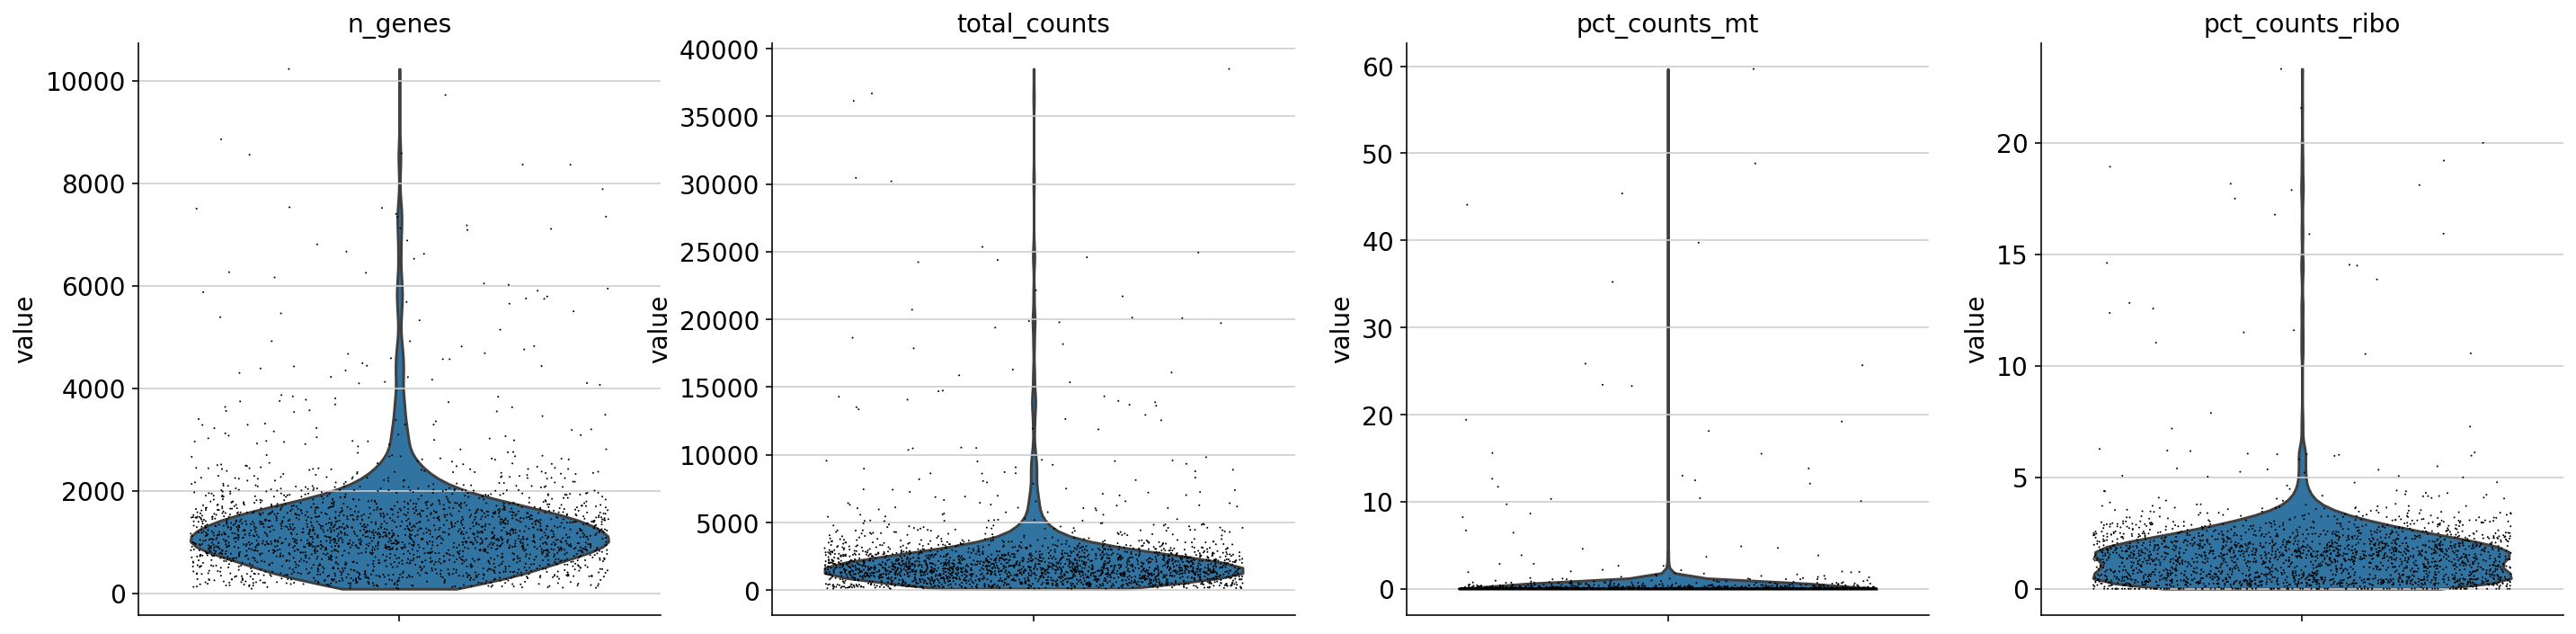

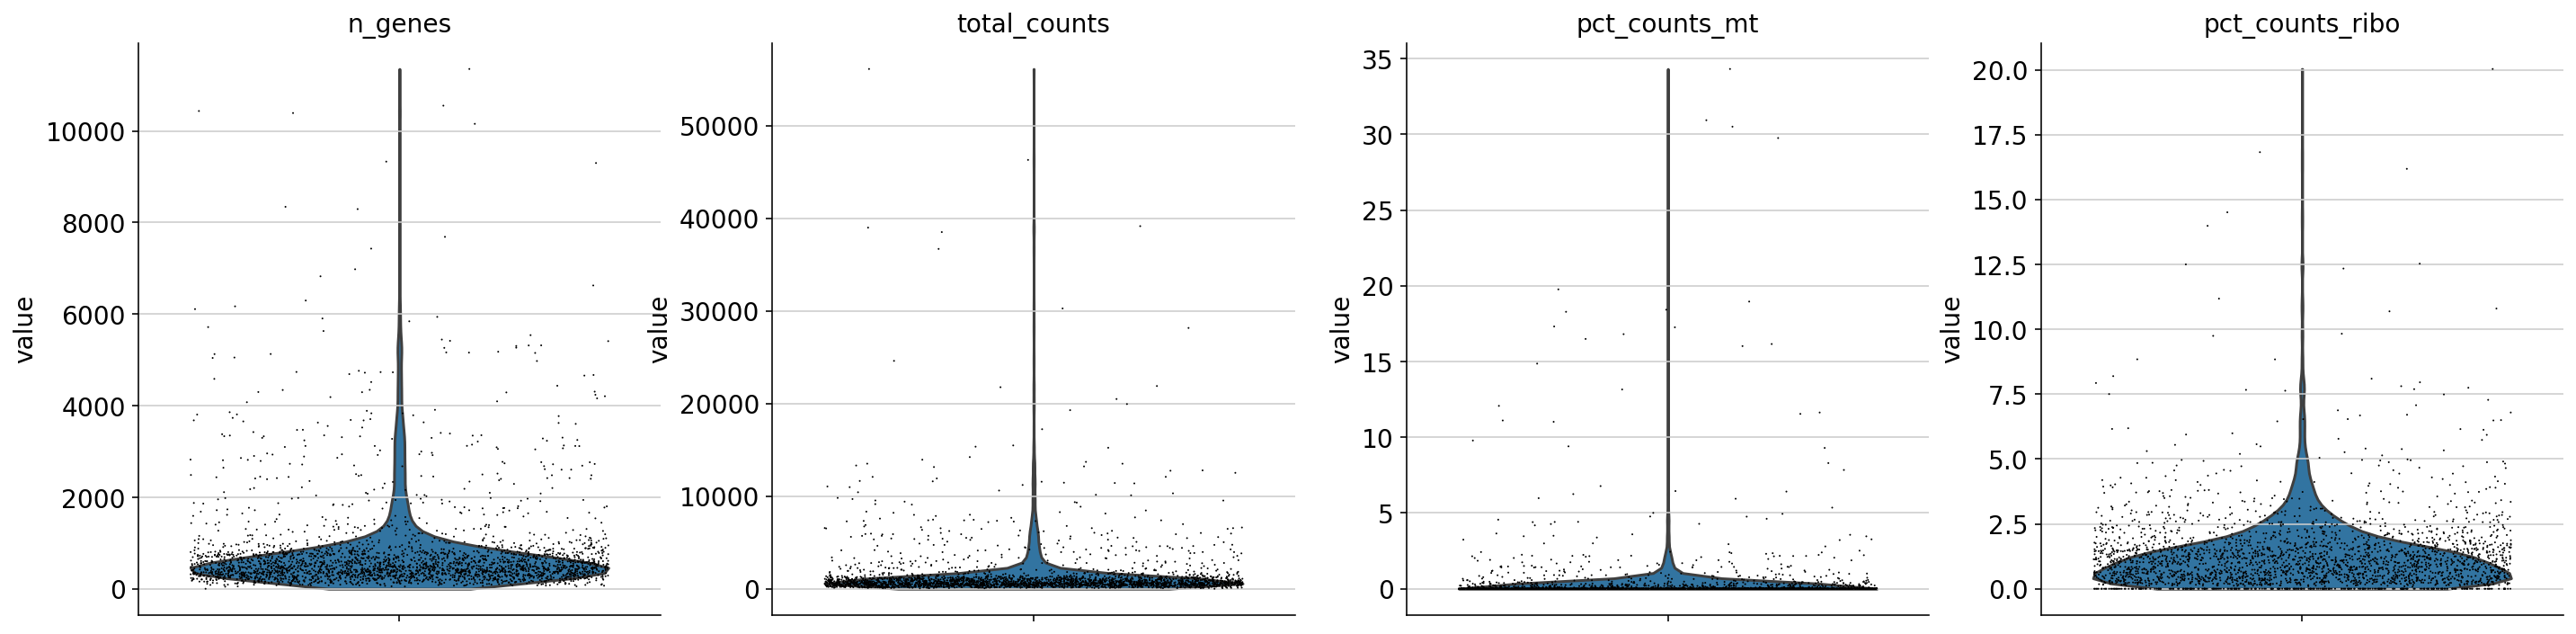

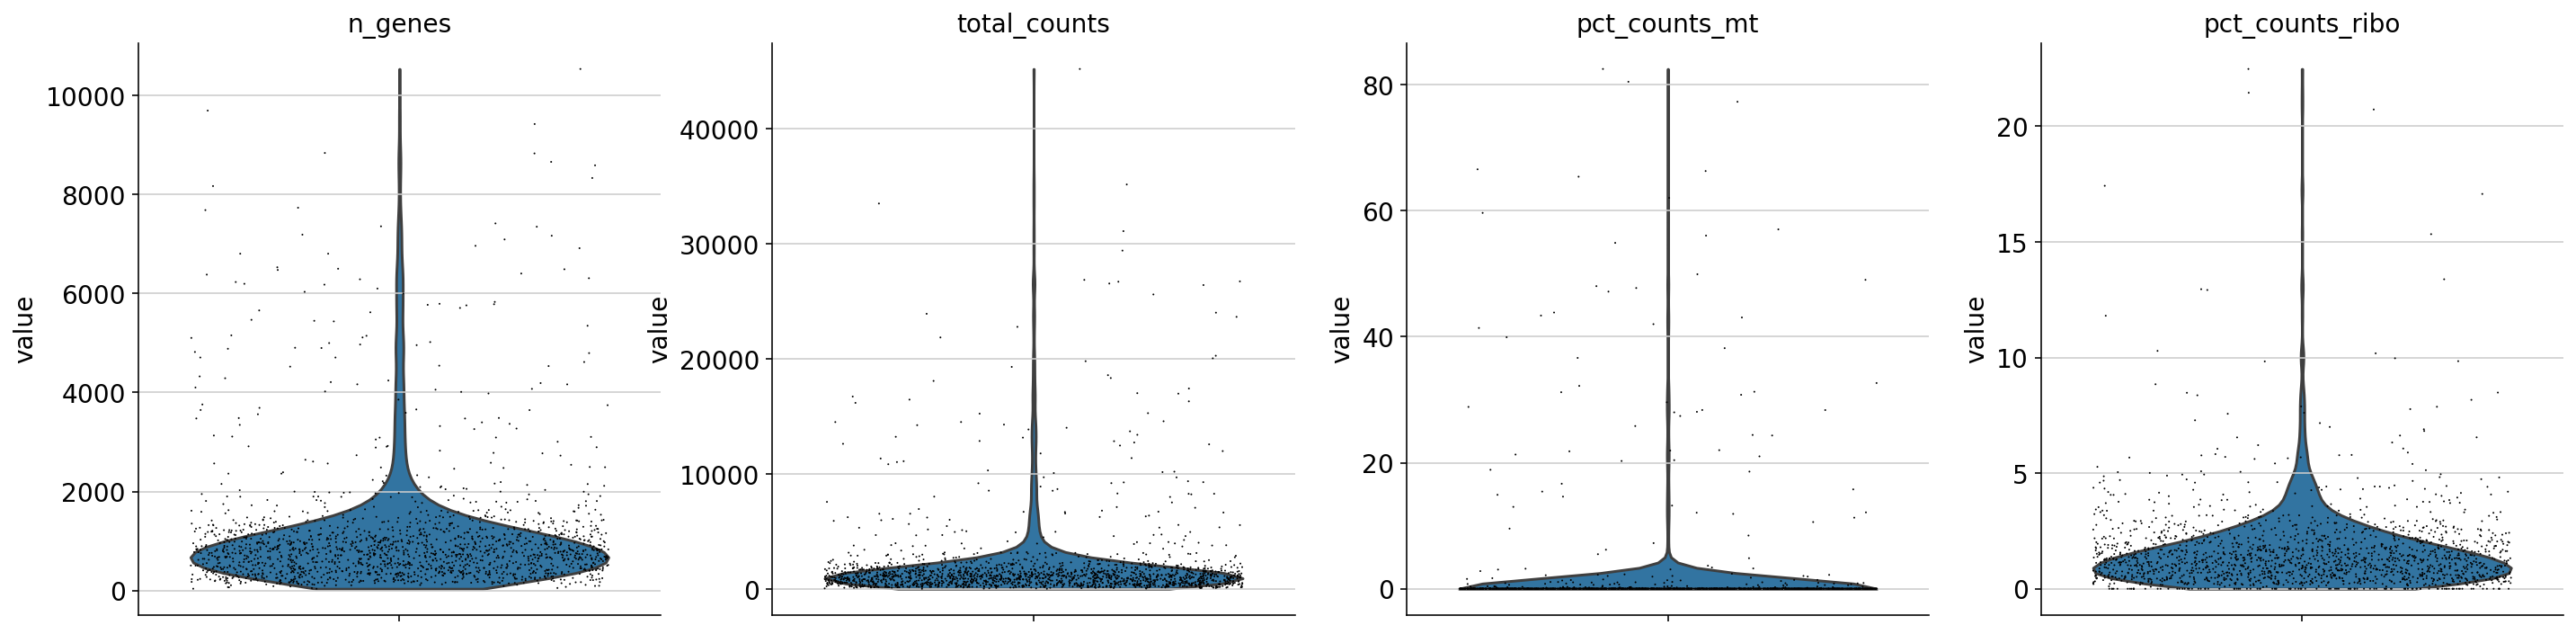

In [39]:
%matplotlib inline
for i in range(numberobj):
    sc.pl.violin(locals()[object_names[i]], ['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True,size =1)#,save= object_names[i]+"_prefilter_all.pdf")
    plt.show()

In [49]:
print("Median numbers without mitochondrial reads\n")


for i in range(numberobj):
    median_counts = np.median(locals()[object_names[i]].obs['total_counts_mito'])
    mean_counts= int(np.mean(locals()[object_names[i]].obs['total_counts_mito']))

    median_counts_mito = np.median(locals()[object_names[i]].obs['total_counts']) 
    mean_counts_mito =int(np.mean(locals()[object_names[i]].obs['total_counts']))

    median_difference = median_counts - median_counts_mito 
    mean_difference = mean_counts -  mean_counts_mito
    
    pct_median_diff = median_difference / median_counts
    pct_mean_diff = mean_difference/mean_counts
    
    print(object_names[i],'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']), '\n',
            "\tmedian reads/nuclei:",median_counts, '(',median_difference,'\t', pct_median_diff,'%',')','\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:", mean_counts, '(',mean_difference,'\t', pct_mean_diff,'%',')','\n')

Median numbers without mitochondrial reads

adata_GSM4157068 
 	median genes/nuclei: 845.0 
 	median reads/nuclei: 1173.5 ( 0.5 	 0.00042607584149978694 % ) 
 	mean genes/nuclei: 993 
 	mean reads/nuclei: 1648 ( 1 	 0.0006067961165048543 % ) 

adata_GSM4157069 
 	median genes/nuclei: 453.5 
 	median reads/nuclei: 607.0 ( 0.5 	 0.0008237232289950577 % ) 
 	mean genes/nuclei: 669 
 	mean reads/nuclei: 1092 ( 1 	 0.0009157509157509158 % ) 

adata_GSM4157070 
 	median genes/nuclei: 993.0 
 	median reads/nuclei: 1452.0 ( 0.0 	 0.0 % ) 
 	mean genes/nuclei: 1220 
 	mean reads/nuclei: 2271 ( 0 	 0.0 % ) 

adata_GSM4157072 
 	median genes/nuclei: 1070.5 
 	median reads/nuclei: 1584.0 ( 0.0 	 0.0 % ) 
 	mean genes/nuclei: 1273 
 	mean reads/nuclei: 2128 ( 1 	 0.00046992481203007516 % ) 

adata_GSM4157074 
 	median genes/nuclei: 1126.0 
 	median reads/nuclei: 1668.0 ( 1.0 	 0.0005995203836930455 % ) 
 	mean genes/nuclei: 1303 
 	mean reads/nuclei: 2243 ( 4 	 0.0017833259028087382 % ) 

adata_GSM

### Save preprocessed files

In [50]:
for i in range(numberobj):
    locals()[object_names[i]].write(os.path.join('data/preprocessed_agarwal_'+object_names[i][6:]+'.h5ad'))

In [51]:
!ls data/

preprocessed_agarwal_GSM4157068.h5ad  preprocessed_altena_g015.h5ad
preprocessed_agarwal_GSM4157069.h5ad  preprocessed_altena_g016.h5ad
preprocessed_agarwal_GSM4157070.h5ad  preprocessed_altena_g017.h5ad
preprocessed_agarwal_GSM4157072.h5ad  preprocessed_altena_g018.h5ad
preprocessed_agarwal_GSM4157074.h5ad  preprocessed_altena_g019.h5ad
preprocessed_agarwal_GSM4157076.h5ad  preprocessed_altena_g020.h5ad
preprocessed_agarwal_GSM4157078.h5ad  preprocessed_smajic_SRR12621867.h5ad
preprocessed_altena_g004.h5ad	      preprocessed_smajic_SRR12621868.h5ad
preprocessed_altena_g005.h5ad	      preprocessed_smajic_SRR12621869.h5ad
preprocessed_altena_g011.h5ad	      preprocessed_smajic_SRR12621870.h5ad
preprocessed_altena_g012.h5ad	      preprocessed_smajic_SRR12621871.h5ad
preprocessed_altena_g013.h5ad	      preprocessed_smajic_SRR12621872.h5ad
preprocessed_altena_g014.h5ad
